In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
# CARREGA DATASET

df_train = pd.read_csv('C:\\Users\\Michele\\Desktop\\Malicious\\Dataset\\Train\\train.csv', engine='python', sep=',')
df_test = pd.read_csv('C:\\Users\\Michele\\Desktop\Malicious\\Dataset\\Test\\test.csv', engine='python', sep=',')


In [152]:
# DADOS DE TREINAMENTO E TESTE

X_train = df_train.drop(columns=['class', 'sub_class'], axis=1)
X_test = df_test.drop(columns=['class', 'sub_class'])

y_train = df_train['class']
y_test = df_test['class']

In [153]:
# IMPORTANDO O MODELO KNN
from sklearn.neighbors import KNeighborsClassifier 

from sklearn.model_selection import train_test_split

In [154]:
# DEFININDO O NÚMERO DOS K VIZINHOS
classifier = KNeighborsClassifier(n_neighbors=8)  

# TREINANDO O MODELO
classifier.fit(X_train, y_train)  

KNeighborsClassifier(n_neighbors=8)

In [155]:
# Prevendo valores de Y para os dados de teste (X_test)
y_pred = classifier.predict(X_test) 

RELATÓRIO DE CLASSIFICAÇÃO: 
               precision    recall  f1-score   support

           0       0.82      0.93      0.87     14817
           1       0.80      0.57      0.67      7209

    accuracy                           0.81     22026
   macro avg       0.81      0.75      0.77     22026
weighted avg       0.81      0.81      0.80     22026

ACURÁCIA DO MODELO:  0.8136293471352039


<AxesSubplot:>

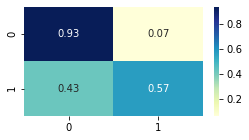

In [159]:
# IMPORTANDO PARA VALIDAÇÃO DO MODELO
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Imprimindo a matriz confusa
#print("Matriz Confusa: ")
#print(confusion_matrix(y_test, y_pred), "\n")  

# RELATÓRIO DE CLASSIFICAÇÃO
print("RELATÓRIO DE CLASSIFICAÇÃO: \n", classification_report(y_test, y_pred))  

# ACURÁCIA
print('ACURÁCIA DO MODELO: ' , accuracy_score(y_test, y_pred))

# MATRIZ DE CONFUSÃO
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred, normalize='true')
cr = classification_report(y_test, y_pred, labels=[0,1], output_dict=True)

fig, ax = plt.subplots(figsize=(4,2))
sns.heatmap(cm, cmap="YlGnBu", annot=True, fmt=".2f")

Text(0, 0.5, 'Média de Erro')

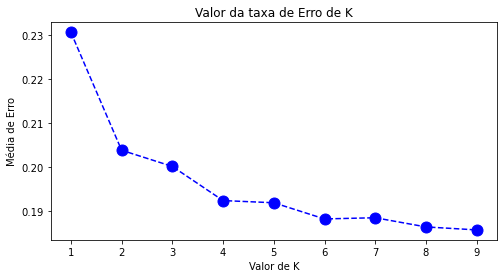

In [160]:
# CALCULANDO O VALOR DE ERRO DE K

error = []
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(8, 4))  
plt.plot(range(1, 10), error, color='blue', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=11)
plt.title('Valor da taxa de Erro de K')  
plt.xlabel('Valor de K')  
plt.ylabel('Média de Erro') 

In [ ]:
#CROSS VALIDATION

In [162]:
from sklearn.model_selection import cross_val_score

for i, score in enumerate(cross_validate(classifier, X_train, y_train, cv=5)["test_score"]):
    print(f"Acurácia K-fold no. {i} : {score}")

Acurácia K-fold no. 0 : 0.814369218546053
Acurácia K-fold no. 1 : 0.8149262202043133
Acurácia K-fold no. 2 : 0.8055618615209988
Acurácia K-fold no. 3 : 0.8120885357548241
Acurácia K-fold no. 4 : 0.8127695800227015
